In [1]:

#from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aynurkasikara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aynurkasikara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aynurkasikara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('train.tsv', sep='\t')
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [5]:
data.Sentiment.unique()

array([1, 2, 3, 4, 0])

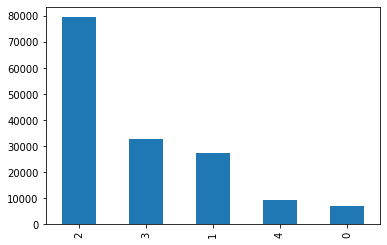

In [6]:
data.Sentiment.value_counts().plot.bar()

In [7]:
data['Sentiment'].replace([0,1,3,4], ["negative", "negative", "positive", "positive"], inplace = True)

In [8]:
data.shape

(156060, 4)

In [9]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,negative
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [10]:
data = data[data['Sentiment']!=2]

In [11]:
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,negative
21,22,1,good for the goose,positive
22,23,1,good,positive
33,34,1,"the gander , some of which occasionally amuses...",negative
46,47,1,amuses,positive
...,...,...,...,...
156047,156048,8544,quietly suggesting the sadness and obsession b...,negative
156051,156052,8544,sadness and obsession,negative
156052,156053,8544,sadness and,negative
156056,156057,8544,forced avuncular chortles,negative


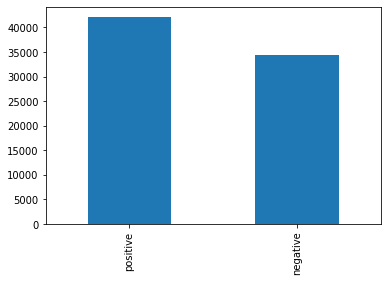

In [18]:
data.Sentiment.value_counts().plot.bar()

In [12]:
df = pd.DataFrame()

df['sentences'] = data['Phrase']
df['label'] = data['Sentiment']

In [13]:
df.head()

,sentences,label
0,A series of escapades demonstrating the adage ...,negative
21,good for the goose,positive
22,good,positive
33,"the gander , some of which occasionally amuses...",negative
46,amuses,positive


In [16]:
#rare_words = pd.Series(' '.join(df['sentences']).split()).value_counts()[-100:]
#df['sentences'] = df['sentences'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

In [17]:
#rare_words

Debut         2
According     2
baffle        2
tinge         2
Kozmo         2
             ..
assailants    1
bio-doc       1
Senegalese    1
coke          1
observer      1
Length: 1000, dtype: int64

In [19]:
pd.Series(" ".join(df["sentences"]).split()).value_counts()[pd.Series(" ".join(df["sentences"]).split()).value_counts() <=2]

Prepare           2
guilt-suffused    2
Versace           2
Intimate          2
Tells             2
                 ..
assailants        1
bio-doc           1
Senegalese        1
coke              1
observer          1
Length: 2242, dtype: int64

In [20]:
df.head()

,sentences,label
0,A series of escapades demonstrating the adage ...,negative
21,good for the goose,positive
22,good,positive
33,"the gander , some of which occasionally amuses...",negative
46,amuses,positive


In [21]:
df.shape

(76478, 2)

In [22]:
#Text Preprocessing
# **Word Tokenization and lowercase**
df["sentences"]=df["sentences"].apply(lambda x: word_tokenize(x.lower()))
#**Remove Punctuation and numbers and chars like "*" and "#"**
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i.isalpha()))
# **Remove Stopwords**
stop_words = stopwords.words('english')
df["sentences"]=df["sentences"].apply(lambda x: list(i for i in x if i not in stop_words))
# **lemmatization**
lem=WordNetLemmatizer()
df["sentences"]=df["sentences"].apply(lambda x: list(lem.lemmatize(i) for i in x))
# join
df["sentences"]=df["sentences"].apply(lambda x: " ".join(x))

In [23]:
df.head()

,sentences,label
0,series escapade demonstrating adage good goose...,negative
21,good goose,positive
22,good,positive
33,gander occasionally amuses none amount much story,negative
46,amuses,positive


In [24]:
df.iloc[0]

sentences    series escapade demonstrating adage good goose...
label                                                 negative
Name: 0, dtype: object

### Train_Test_Split

In [25]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df["sentences"],
                                                                   df["label"],
                                                                    random_state = 1)


In [26]:
X_train.head()

118788    present fascinating glimpse urban life class w...
89514     hey everybody wan na watch movie guy dressed c...
86857                               incredible number story
140626                         ultimately disappoint action
153243                                              unified
Name: sentences, dtype: object

In [27]:
encoder = preprocessing.LabelEncoder()

In [28]:
y_train = encoder.fit_transform(y_train)

In [29]:
y_test = encoder.fit_transform(y_test)

In [30]:
y_train[:5]

array([1, 0, 1, 0, 1])

In [31]:
y_test[:5]

array([1, 0, 1, 0, 0])

In [32]:
# Count Vectors
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [33]:
X_train_count = vectorizer.transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [34]:
vectorizer.get_feature_names()[:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [35]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
## TFIDF
tfidf_word_vec = TfidfVectorizer()
tfidf_word_vec.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [37]:
X_train_tfidf = tfidf_word_vec.transform(X_train)
X_test_tfidf = tfidf_word_vec.transform(X_test)

In [38]:
tfidf_word_vec.get_feature_names()[:5]

['aaa', 'aaliyah', 'aan', 'abagnale', 'abandon']

In [39]:
a = pd.DataFrame(X_train_tfidf.toarray())

In [40]:
a.head()

,0,1,2,3,4,5,6,7,8,9,...,12793,12794,12795,12796,12797,12798,12799,12800,12801,12802
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
## Classification Models

In [42]:
### Logistic Regression

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
# Make predictions
y_pred = log_classifier.predict(X_test_count)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[7205 1438]
 [1010 9467]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      8643
           1       0.87      0.90      0.89     10477

    accuracy                           0.87     19120
   macro avg       0.87      0.87      0.87     19120
weighted avg       0.87      0.87      0.87     19120



In [45]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_count, y_train)
log_accuracy_count = model_selection.cross_val_score(log_classifier,
                                           X_test_count,
                                           y_test,
                                           cv = 10).mean()
print("Count Vectors Accuracy:", log_accuracy_count)

Count Vectors Accuracy: 0.827039748953975


In [46]:
log_classifier = linear_model.LogisticRegression()
log_classifier.fit(X_train_tfidf, y_train)
log_accuracy_count = model_selection.cross_val_score(log_classifier,
                                           X_test_tfidf,
                                           y_test,
                                           cv = 10).mean()
print("TF-IDF Accuracy:", log_accuracy_count)

TF-IDF Accuracy: 0.8234309623430963
